In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 


In [2]:
data = pd.read_csv(r"D:\Datasets\bmi.csv")

In [3]:
data

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
data.tail()

,Gender,Height,Weight,Index
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [6]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [7]:
data.columns


Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

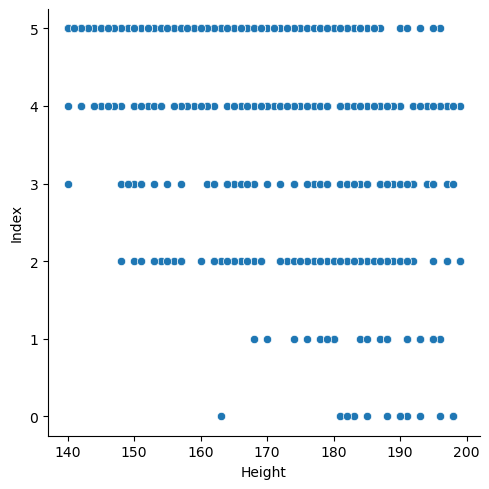

In [10]:
sns.relplot( x = 'Height' , y= 'Index' , data = data)

In [14]:
from sklearn import svm 
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [15]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [16]:
#we have used labelEncoder to transform the value of gender from male,famale to 1 and 0 respectively.
gender = LabelEncoder()
data['Gender'] = gender.fit_transform(data['Gender'])

In [19]:
bins = (-1, 0 ,1,2,3,4,5)
health = ['malnourished' , 'underweight' , 'fit' , 'slightly overweight', 'overweight', 'extreme overweight' ]
data['Index'] = pd.cut(data['Index'], bins = bins, labels = health)

In [20]:
data['Index']

0               overweight
1                      fit
2               overweight
3      slightly overweight
4      slightly overweight
              ...         
495     extreme overweight
496             overweight
497     extreme overweight
498     extreme overweight
499     extreme overweight
Name: Index, Length: 500, dtype: category
Categories (6, object): ['malnourished' < 'underweight' < 'fit' < 'slightly overweight' < 'overweight' < 'extreme overweight']

In [24]:
data['Gender'].value_counts()

Gender
0    255
1    245
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Index'>

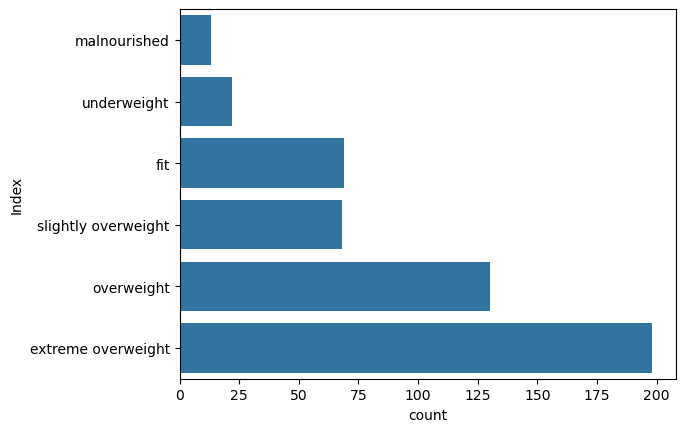

In [26]:
sns.countplot(data['Index'])

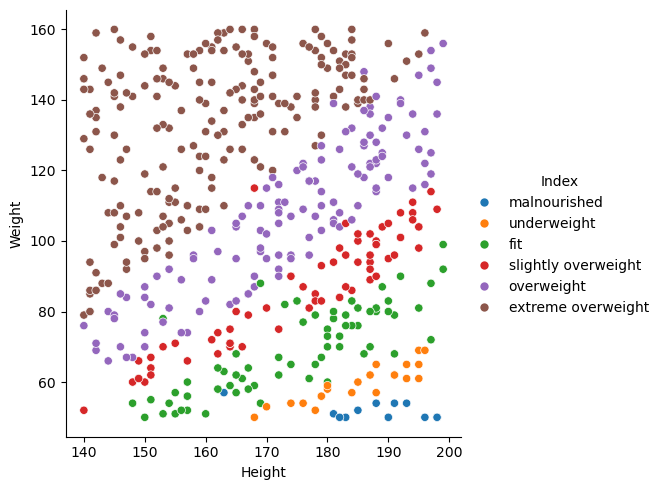

In [27]:
sns.relplot(x = 'Height' , y = 'Weight' , hue = 'Index' , data = data)

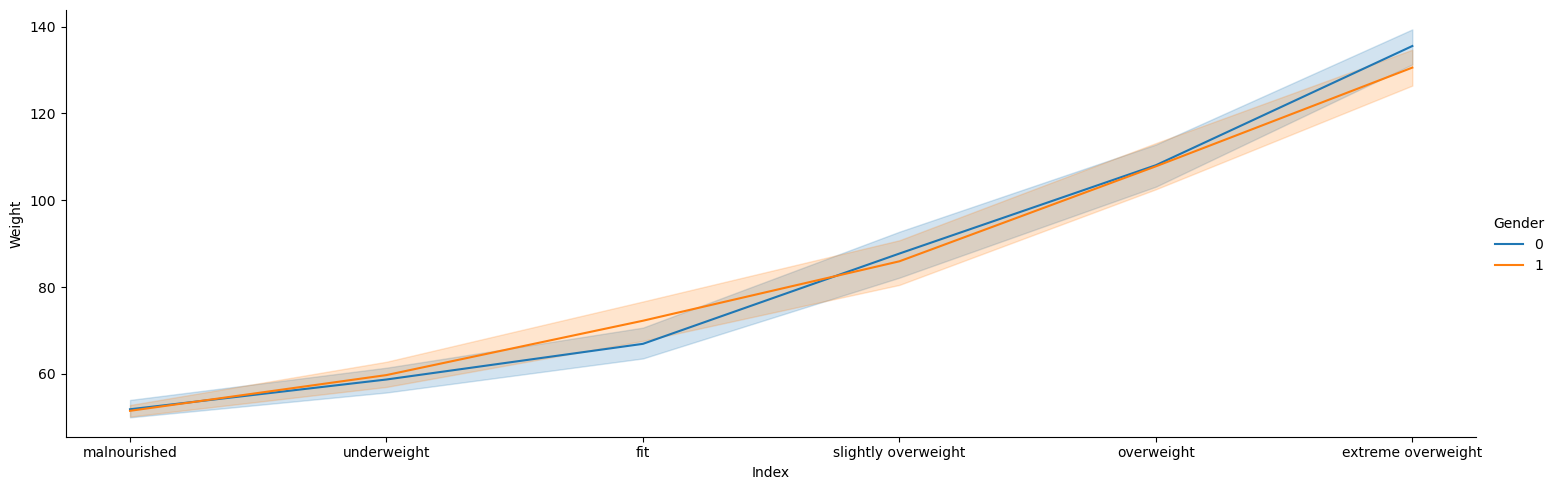

In [34]:
sns.relplot(x = 'Index' , y = 'Weight' , hue = 'Gender' ,kind ='line', data = data ,height = 5, aspect=3)

In [36]:
x = data.drop('Index', axis = 1)
y = data['Index']

In [37]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state =0)


In [38]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

In [40]:
clf = svm.SVC()
clf.fit(x_train , y_train)
pred = clf.predict(x_test)

In [42]:
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

 extreme overweight       0.88      0.97      0.92        36
                fit       0.73      0.80      0.76        10
       malnourished       0.00      0.00      0.00         3
         overweight       0.96      0.78      0.86        32
slightly overweight       0.78      0.93      0.85        15
        underweight       0.60      0.75      0.67         4

           accuracy                           0.85       100
          macro avg       0.66      0.71      0.68       100
       weighted avg       0.84      0.85      0.84       100



C:\Users\manis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\manis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
print(confusion_matrix(y_test ,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [44]:
print(accuracy_score(y_test, pred))

0.85


In [48]:
a = [[0,185, 90]]
a = s.transform(a)
b = clf.predict(a)

C:\Users\manis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [49]:
b

array(['slightly overweight'], dtype=object)